<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_14_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [285]:
excel_file = pd.ExcelFile('/content/glass.xlsx')
excel_file.sheet_names

['Description', 'glass']

In [286]:
df=pd.read_excel('/content/glass.xlsx',sheet_name='glass')



In [287]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [288]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [290]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [291]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


Visulization

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

Box_plot

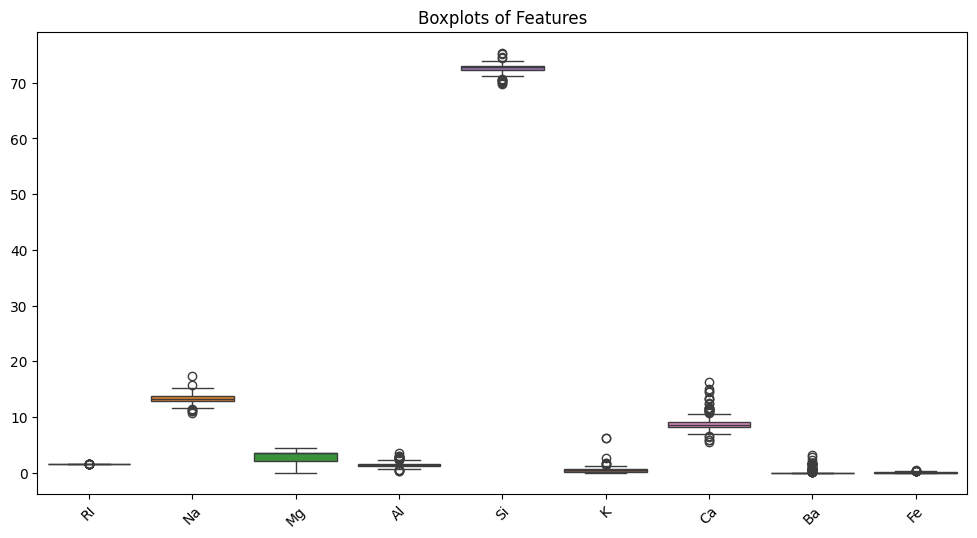

In [293]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=45)
plt.title('Boxplots of Features')
plt.show()

In [294]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [295]:
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))

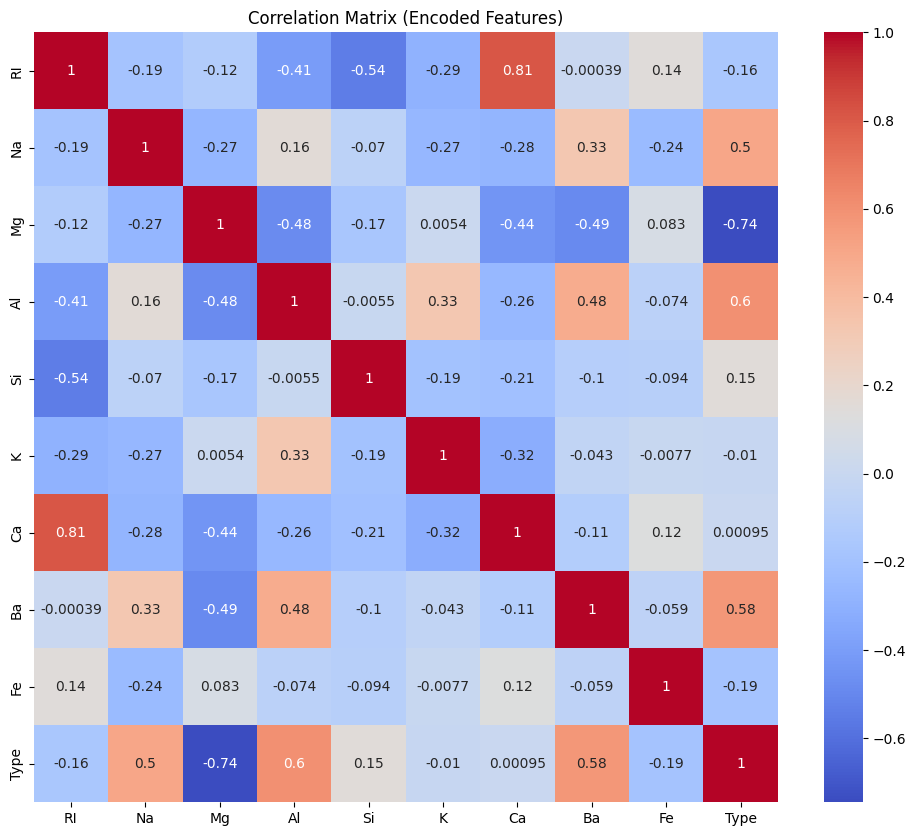

In [296]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Encoded Features)")
plt.show()

Data Processing

In [297]:
df = pd.read_excel('/content/glass.xlsx', sheet_name="glass")
X = df.drop("Type", axis=1)
y = df["Type"].astype(int)

In [298]:
y = y.astype(int)

In [299]:
y.unique()

array([1, 2, 3, 5, 6, 7])

In [300]:
y.value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


**Standardization**

In [301]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Handle imbalance using SMOTE

In [302]:

sm = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)


Train_Test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


**Random Forest Classifier**

In [304]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [305]:
y_pred_rf

array([1, 5, 7, 6, 6, 6, 6, 5, 7, 7, 5, 7, 7, 5, 6, 6, 7, 7, 3, 5, 7, 2,
       2, 1, 1, 6, 2, 7, 2, 1, 1, 3, 2, 3, 5, 7, 3, 3, 2, 7, 3, 2, 2, 3,
       7, 5, 3, 5, 1, 1, 3, 3, 7, 1, 2, 3, 7, 2, 7, 1, 7, 5, 7, 1, 3, 6,
       5, 2, 7, 5, 3, 3, 6, 3, 1, 5, 6, 5, 5, 3, 7, 3, 1, 6, 1, 5, 6, 1,
       6, 7, 5, 1, 1, 2, 7, 3, 3, 2, 6, 6, 6, 6, 3, 1, 3, 6, 6, 3, 1, 1,
       7, 6, 5, 1, 2, 6, 7, 5, 6, 2, 6, 5, 3, 3, 1, 2, 5, 5, 7, 1, 5, 2,
       5, 3, 6, 5, 5])

In [306]:
rf

RandomForestClassifier(random_state=42)

Result of RM

In [307]:
print(confusion_matrix(y_test, y_pred_rf))

[[18  1  3  0  0  0]
 [ 3 16  0  2  1  1]
 [ 1  0 22  0  0  0]
 [ 0  0  0 22  0  1]
 [ 0  0  0  0 23  0]
 [ 0  0  0  1  0 22]]


In [308]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        22
           2       0.94      0.70      0.80        23
           3       0.88      0.96      0.92        23
           5       0.88      0.96      0.92        23
           6       0.96      1.00      0.98        23
           7       0.92      0.96      0.94        23

    accuracy                           0.90       137
   macro avg       0.90      0.90      0.89       137
weighted avg       0.90      0.90      0.89       137



In [309]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8978102189781022


**Bagging Classifier**

In [310]:
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)


Result Of Bagging Classifier

In [311]:
print(confusion_matrix(y_test, y_pred_bag))

[[19  1  2  0  0  0]
 [ 3 15  1  2  1  1]
 [ 2  0 20  0  1  0]
 [ 0  2  0 20  0  1]
 [ 0  0  0  0 23  0]
 [ 0  0  0  1  0 22]]


In [312]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           1       0.79      0.86      0.83        22
           2       0.83      0.65      0.73        23
           3       0.87      0.87      0.87        23
           5       0.87      0.87      0.87        23
           6       0.92      1.00      0.96        23
           7       0.92      0.96      0.94        23

    accuracy                           0.87       137
   macro avg       0.87      0.87      0.87       137
weighted avg       0.87      0.87      0.87       137



In [313]:
print("Accuracy:", accuracy_score(y_test, y_pred_bag))

Accuracy: 0.8686131386861314


**Boosting Classifier (AdaBoost)**

In [314]:
boosting = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)

Result Of Boosting

In [315]:
print(confusion_matrix(y_test, y_pred_boost))

[[ 1 19  2  0  0  0]
 [ 2 14  2  5  0  0]
 [ 1 20  2  0  0  0]
 [ 0 14  0  8  0  1]
 [ 0  0  0  0 23  0]
 [ 0  0  0  0  0 23]]


In [316]:
print(classification_report(y_test, y_pred_boost))

              precision    recall  f1-score   support

           1       0.25      0.05      0.08        22
           2       0.21      0.61      0.31        23
           3       0.33      0.09      0.14        23
           5       0.62      0.35      0.44        23
           6       1.00      1.00      1.00        23
           7       0.96      1.00      0.98        23

    accuracy                           0.52       137
   macro avg       0.56      0.51      0.49       137
weighted avg       0.56      0.52      0.49       137



In [317]:
print("Accuracy:", accuracy_score(y_test, y_pred_boost))

Accuracy: 0.5182481751824818


**Comparison Summary**

In [318]:
models = ['Random Forest', 'Bagging', 'Boosting']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bag),
    accuracy_score(y_test, y_pred_boost)
]

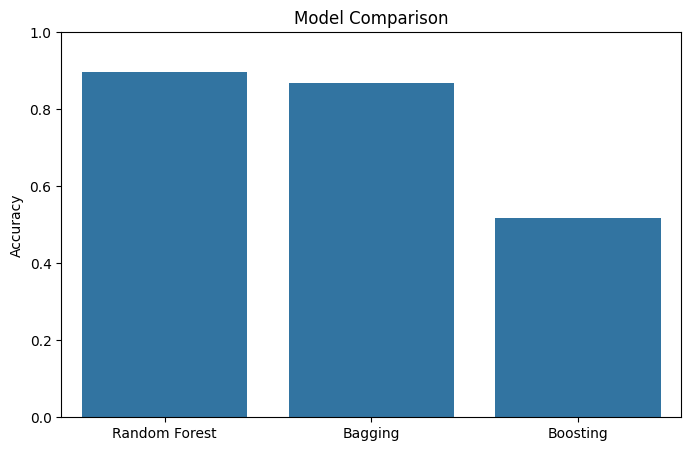

In [319]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

**Bagging**


Bagging is an ensemble method that builds multiple independent models (typically of the same type, e.g., Decision Trees) on different bootstrapped samples of the training data and aggregates their predictions.

**Boosting**


Boosting is an ensemble technique that builds models sequentially, where each model tries to correct the errors made by the previous one.

**Handling Imbalance in Data**

Imbalanced datasets have a disproportionate ratio of classes, which can bias the model toward the majority class, reducing performance on the minority class.